<a href="https://colab.research.google.com/github/Raslec/pytorchlearning/blob/main/pytorchlearning01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np
#索引操作
x = torch.rand(3,4)
print(x)
# 第二列
print(x[:,1])
# 第二行
print(x[1,:])

tensor([[0.8109, 0.9876, 0.3226, 0.9147],
        [0.6934, 0.3907, 0.1327, 0.5584],
        [0.9025, 0.3346, 0.6119, 0.7557]])
tensor([0.9876, 0.3907, 0.3346])
tensor([0.6934, 0.3907, 0.1327, 0.5584])


In [3]:
y = x+1
print(y[1,:])
print(y)

tensor([1.6934, 1.3907, 1.1327, 1.5584])
tensor([[1.8109, 1.9876, 1.3226, 1.9147],
        [1.6934, 1.3907, 1.1327, 1.5584],
        [1.9025, 1.3346, 1.6119, 1.7557]])


In [4]:
# 初始化全零 张量
a = torch.zeros((4,4),dtype=torch.long)
print(a)
#初始化全一 张量
b = torch.ones(4,4)
print(b)
c = torch.tensor(np.ones((2,3),dtype='int32'))
print(c)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)


常见构造Tensor的方法：

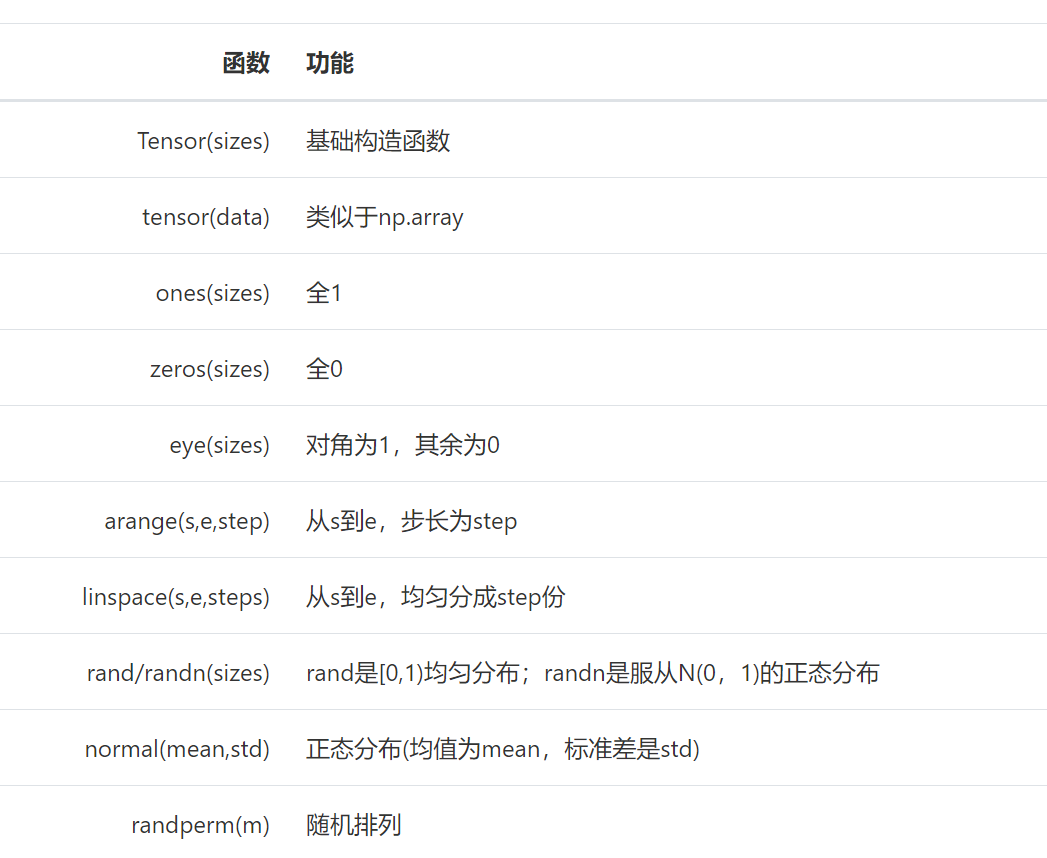





In [5]:
# tensor 的基本操作
# 加法
print(a+b)
# add_ = replace in 操作
y = a.add_(3)
print(y)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[3, 3, 3, 3],
        [3, 3, 3, 3],
        [3, 3, 3, 3],
        [3, 3, 3, 3]])


In [6]:
#索引操作
x = torch.rand(3,4)
print(x)
# 第二列
print(x[:,1])
# 第二行
print(x[1,:])

tensor([[0.7016, 0.7953, 0.5205, 0.8213],
        [0.7348, 0.2756, 0.3848, 0.1195],
        [0.3370, 0.1805, 0.2674, 0.6035]])
tensor([0.7953, 0.2756, 0.1805])
tensor([0.7348, 0.2756, 0.3848, 0.1195])


In [7]:
y = x+1
print(y[1,:])
print(y)

tensor([1.7348, 1.2756, 1.3848, 1.1195])
tensor([[1.7016, 1.7953, 1.5205, 1.8213],
        [1.7348, 1.2756, 1.3848, 1.1195],
        [1.3370, 1.1805, 1.2674, 1.6035]])


In [8]:
#维度变换 张量的维度变换常见的方法有torch.view()和torch.reshape()
x = torch.randn(4,3)
y = x.view(12)
z = x.view(-1,6)
print(x.size(),y.size(),z.size())
print(x)
print(z)
# 最后x tensor size 没有发生改变
#view()仅仅是改变了对这个张量的观察角度
print(x)

torch.Size([4, 3]) torch.Size([12]) torch.Size([2, 6])
tensor([[ 0.7369, -0.9887,  1.0422],
        [ 0.8085, -1.2869, -0.6695],
        [-1.2259, -0.0786,  0.6478],
        [-0.0886,  1.2179,  0.7141]])
tensor([[ 0.7369, -0.9887,  1.0422,  0.8085, -1.2869, -0.6695],
        [-1.2259, -0.0786,  0.6478, -0.0886,  1.2179,  0.7141]])
tensor([[ 0.7369, -0.9887,  1.0422],
        [ 0.8085, -1.2869, -0.6695],
        [-1.2259, -0.0786,  0.6478],
        [-0.0886,  1.2179,  0.7141]])


In [9]:
#我们希望原始张量和变换后的张量互相不影响。
#为了使创建的张量和原始张量不共享内存，我们需要使用第二种方法torch.reshape()， 
#同样可以改变张量的形状，但是此函数并不能保证返回的是其拷贝值，所以官方不推荐使用
a = torch.randn(4,4)
b = a.reshape(2,8)
print(a)
print(b)

tensor([[-0.6058,  0.9799,  0.5565,  0.4824],
        [ 0.0051, -0.4078,  0.6886,  0.6881],
        [-0.9376, -0.2464,  0.5839, -1.0980],
        [-0.8500,  0.7531,  0.4827, -1.1492]])
tensor([[-0.6058,  0.9799,  0.5565,  0.4824,  0.0051, -0.4078,  0.6886,  0.6881],
        [-0.9376, -0.2464,  0.5839, -1.0980, -0.8500,  0.7531,  0.4827, -1.1492]])


In [11]:
#广播机制
#当对两个形状不同的 Tensor 按元素运算时，可能会触发广播(broadcasting)机制：先适当复制元素使这两个 Tensor 形状相同后再按元素运算。
x = torch.arange(1,5).view(1,4)
print(x)
y = torch.arange(1,5).view(4,1)
print(y)
print(x+y)


tensor([[1, 2, 3, 4]])
tensor([[1],
        [2],
        [3],
        [4]])
tensor([[2, 3, 4, 5],
        [3, 4, 5, 6],
        [4, 5, 6, 7],
        [5, 6, 7, 8]])
